In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



In [2]:
df = pd.read_csv('crime.csv')

In [3]:
df

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
0,1965,18073000,836,2320,28182,27464,183443,58452
1,1966,18258000,882,2439,30098,29142,196127,64368
2,1967,18336000,996,2665,40202,31261,219157,83775
3,1968,18113000,1185,2527,59857,34946,250918,104877
4,1969,18321000,1324,2902,64754,36890,248477,115400
5,1970,18190740,1444,2875,81149,39145,267474,125674
6,1971,18391000,1823,3225,97682,42318,273704,127658
7,1972,18366000,2026,4199,86391,45926,239886,105081
8,1973,18265000,2040,4852,80795,47781,246246,112328
9,1974,18111000,1919,5240,86814,51454,271824,104095


In [4]:
df.head()

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
0,1965,18073000,836,2320,28182,27464,183443,58452
1,1966,18258000,882,2439,30098,29142,196127,64368
2,1967,18336000,996,2665,40202,31261,219157,83775
3,1968,18113000,1185,2527,59857,34946,250918,104877
4,1969,18321000,1324,2902,64754,36890,248477,115400


In [5]:
df.tail()

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
42,2007,19297729,801,2926,31094,45094,64857,28030
43,2008,19467789,836,2799,31789,42122,65537,25096
44,2009,19541453,781,2582,28141,43606,62769,21871
45,2010,19395206,868,2797,28630,44197,65839,20639
46,2011,19465197,774,2752,28396,45568,65397,19311


In [6]:
df.sample()

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
10,1975,18120000,1996,5099,93499,54593,301996,116274


In [7]:
df1 = df.iloc[:200]
df1.head(200)

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,CarTheft
0,1965,18073000,836,2320,28182,27464,183443,58452
1,1966,18258000,882,2439,30098,29142,196127,64368
2,1967,18336000,996,2665,40202,31261,219157,83775
3,1968,18113000,1185,2527,59857,34946,250918,104877
4,1969,18321000,1324,2902,64754,36890,248477,115400
5,1970,18190740,1444,2875,81149,39145,267474,125674
6,1971,18391000,1823,3225,97682,42318,273704,127658
7,1972,18366000,2026,4199,86391,45926,239886,105081
8,1973,18265000,2040,4852,80795,47781,246246,112328
9,1974,18111000,1919,5240,86814,51454,271824,104095


Feature Selection for Clustering Algorithms

In [8]:
features = ['Population', 'Murder']
X = df1[features].values
y = df1['Rape'].astype(float).values

In [9]:
features

['Population', 'Murder']

In [10]:
X

array([[18073000,      836],
       [18258000,      882],
       [18336000,      996],
       [18113000,     1185],
       [18321000,     1324],
       [18190740,     1444],
       [18391000,     1823],
       [18366000,     2026],
       [18265000,     2040],
       [18111000,     1919],
       [18120000,     1996],
       [18084000,     1969],
       [17924000,     1919],
       [17748000,     1820],
       [17649000,     2092],
       [17506690,     2228],
       [17594000,     2166],
       [17659000,     2013],
       [17667000,     1958],
       [17735000,     1786],
       [17783000,     1683],
       [17772000,     1907],
       [17825000,     2016],
       [17898000,     2244],
       [17950000,     2246],
       [17990455,     2605],
       [18058000,     2571],
       [18119000,     2397],
       [18197000,     2420],
       [18169000,     2016],
       [18136000,     1550],
       [18185000,     1353],
       [18137000,     1093],
       [18175000,      924],
       [181966

In [11]:
y

array([2320., 2439., 2665., 2527., 2902., 2875., 3225., 4199., 4852.,
       5240., 5099., 4663., 5272., 5168., 5394., 5405., 5479., 5159.,
       5296., 5599., 5706., 5415., 5537., 5479., 5242., 5368., 5085.,
       5152., 5008., 4700., 4290., 4174., 4075., 3843., 3563., 3530.,
       3546., 3885., 3775., 3608., 3636., 3169., 2926., 2799., 2582.,
       2797., 2752.])

Plotting the actual data to vizualize it

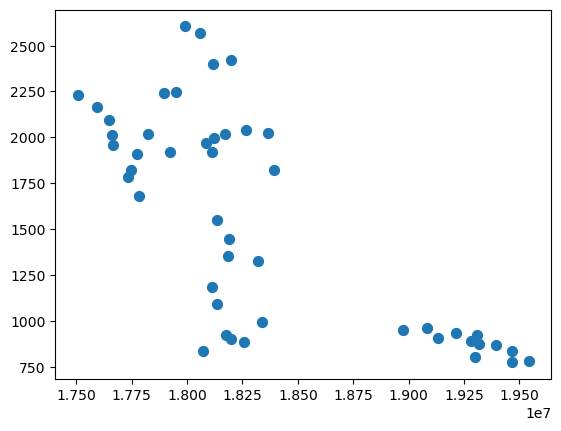

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50);

Splitting the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Using the elbow method to find the optimal number of clusters

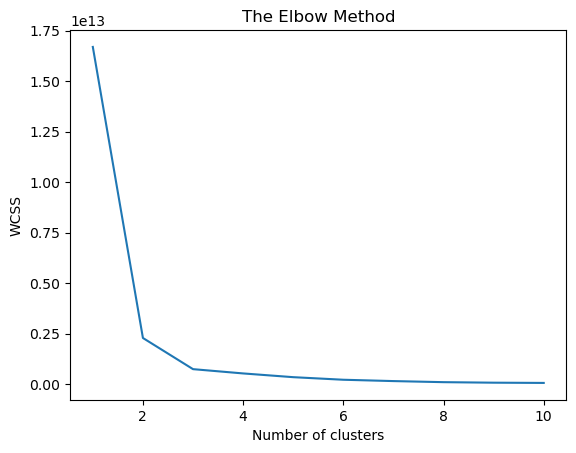

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Vizualising the clusters

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

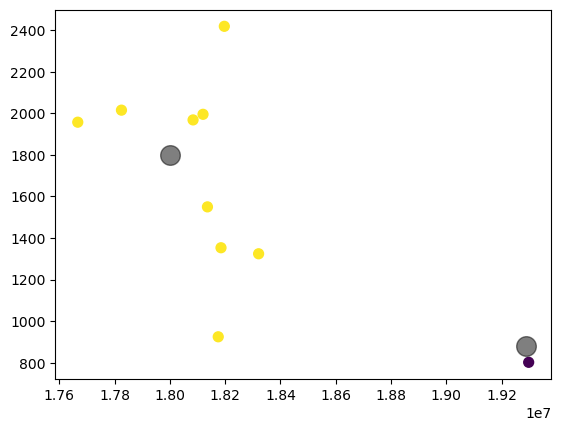

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Metrics Calculation

In [ ]:
Year = df1['Rape'].astype(int)


In [ ]:
Year.replace('?','0', inplace = True)

In [ ]:
%matplotlib inline
Year.hist()
plt.title('Year')
plt.xlabel('Rape')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Population = df1['Population'].astype(int)
%matplotlib inline
Population.hist()
plt.title('Rape')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show